In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import yfinance as yf
import os
from pathlib import Path
import sys


/tmp/ipykernel_9102/376926263.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
# Coleta da taxa de retorno risk free

def deannualize(annual_rate, periods=365):
    return (1 + annual_rate) ** (1/periods) - 1

annualized = yf.download("^IRX", start="1995-01-01", end="2023-12-31")["Adj Close"]
daily = annualized.apply(deannualize)

# create dataframe
risk_free_rates = pd.DataFrame({"annualized": annualized, "daily": daily})
risk_free_rates['daily'] = risk_free_rates['daily'] / 100
print(np.shape(risk_free_rates))
risk_free_rates.head()

/home/marcelo/.local/lib/python3.10/site-packages/yfinance/utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[*********************100%%**********************]  1 of 1 completed

(7282, 2)


,annualized,daily
Date,,
1995-01-03,5.52,0.000051
1995-01-04,5.69,0.000052
1995-01-05,5.71,0.000052
1995-01-06,5.74,0.000052
1995-01-09,5.75,0.000052


In [3]:
# Usando Google Colab:
'''
from google.colab import drive

drive.mount('/content/drive')
pasta = str("/content/drive/MyDrive/Python/TCC-Cloud/Distancia-Cointegração/result_distancia/")
pasta
'''

'\nfrom google.colab import drive\n\ndrive.mount(\'/content/drive\')\npasta = str("/content/drive/MyDrive/Python/TCC-Cloud/Distancia-Cointegração/result_distancia/")\npasta\n'

In [4]:
# No computador:
pasta = str(Path.cwd().parents[0]) + ("/Distancia-Cointegração/result_distancia/")
pasta

'/mnt/c/Users/MarceloPolecram/Python/MEU_TCC/Distancia-Cointegração/result_distancia/'

In [5]:
# Dataframes:
operations10 = pd.read_csv(pasta + "operations_D10.csv")
operations5 = pd.read_csv(pasta + "operations_D5.csv")
operations20 = pd.read_csv(pasta + "operations_D20.csv")
operations100 = pd.read_csv(pasta + "operations_D100.csv")

# Top 100 Pares
print("Operações com 100 pares:")
operations100['Pair'] = operations100['Ticker 1'] + "-" + operations100['Ticker 2']
print(operations100.tail())

# Top 20 Pares
print("\nOperações com 20 pares:")
operations20['Pair'] = operations20['Ticker 1'] + "-" + operations20['Ticker 2']
print(operations20.tail())

# Top 10 Pares
print("\nOperações com 10 pares:")
operations10['Pair'] = operations10['Ticker 1'] + "-" + operations10['Ticker 2']
print(operations10.tail())

# Top 5 Pares
print("\nOperações com 5 pares:")
operations5['Pair'] = operations5['Ticker 1'] + "-" + operations5['Ticker 2']
print(operations5.tail())

Operações com 100 pares:
       Operação  Semestre  Abertura  Fechamento  Dias  Retorno total Ticker 1  \
11280         1        54        86         127    41       0.007841    HYPE3   
11281         1        54       110         127    17      -0.042264    CSAN3   
11282         1        54        58         108    50       0.047550    PCAR3   
11283         2        54       109         127    18       0.054243    PCAR3   
11284         1        54        96         127    31       0.134664    RDOR3   

      Ticker 2  Converged          Index  Retorno total - exp         Pair  
11280    VIVT3      False  HYPE3-VIVT3-1             1.007872  HYPE3-VIVT3  
11281    CMIG3      False  CSAN3-CMIG3-1             0.958616  CSAN3-CMIG3  
11282    DXCO3       True  PCAR3-DXCO3-1             1.048699  PCAR3-DXCO3  
11283    DXCO3      False  PCAR3-DXCO3-2             1.055741  PCAR3-DXCO3  
11284    TOTS3      False  RDOR3-TOTS3-1             1.144153  RDOR3-TOTS3  

Operações com 20 pares:
 

In [6]:
def print_ops(operations):
  #print(f"Converged operations: {sum(operations['Converged'])} | Open operations: {np.shape(operations)[0] - sum(operations['Converged'])}")
  print(f"Número de operações: {np.shape(operations)[0]}")
  print(f"Positive Returns: {sum(operations['Retorno total'] > 0)} | Negative: {sum(operations['Retorno total'] < 0)}")
  print(f"Highest Return: {operations['Retorno total'].max()}")
  print(f"Lowest Return: {operations['Retorno total'].min()}")
  print(f"Average Return: {(operations['Retorno total'].mean())}")
  print(f"Average trade lenght: {operations['Dias'].mean()}")
  print(f"Convergência: {(operations['Converged'].sum()/np.shape(operations)[0])*100}")

In [7]:
print("Operações com 100 pares:")
print_ops(operations100)
print("\nOperações com 20 pares:")
print_ops(operations20)
print("\nOperações com 10 pares:")
print_ops(operations10)
print("\nOperações com 5 pares:")
print_ops(operations5)

Operações com 100 pares:
Número de operações: 11285
Positive Returns: 6084 | Negative: 5110
Highest Return: 1.0986122886621712
Lowest Return: -0.9125232342662196
Average Return: 0.010521197061289159
Average trade lenght: 36.417545414266726
Convergência: 65.23704031900753

Operações com 20 pares:
Número de operações: 2194
Positive Returns: 1230 | Negative: 942
Highest Return: 0.534988480913657
Lowest Return: -0.7578567681906341
Average Return: 0.015936658441827754
Average trade lenght: 34.43254329990884
Convergência: 63.992707383773926

Operações com 10 pares:
Número de operações: 1117
Positive Returns: 610 | Negative: 492
Highest Return: 0.534988480913657
Lowest Return: -0.6190471636557808
Average Return: 0.009638192562292815
Average trade lenght: 34.04565801253357
Convergência: 62.75738585496866

Operações com 5 pares:
Número de operações: 565
Positive Returns: 304 | Negative: 254
Highest Return: 0.3269734844863035
Lowest Return: -0.6190471636557808
Average Return: 0.00592931556241473

In [8]:
# Return Distribution
def print_ret(operations):
  fig = plt.figure(figsize=(15, 7))
  ax1 = fig.add_subplot(1, 1, 1)
  operations['Retorno total'].hist(bins=50, ax=ax1)
  ax1.set_xlabel('Retorno')
  ax1.set_ylabel('Amostra')
  ax1.set_title('Distribuição dos Retornos')
  plt.show()


Operações com 100 pares:


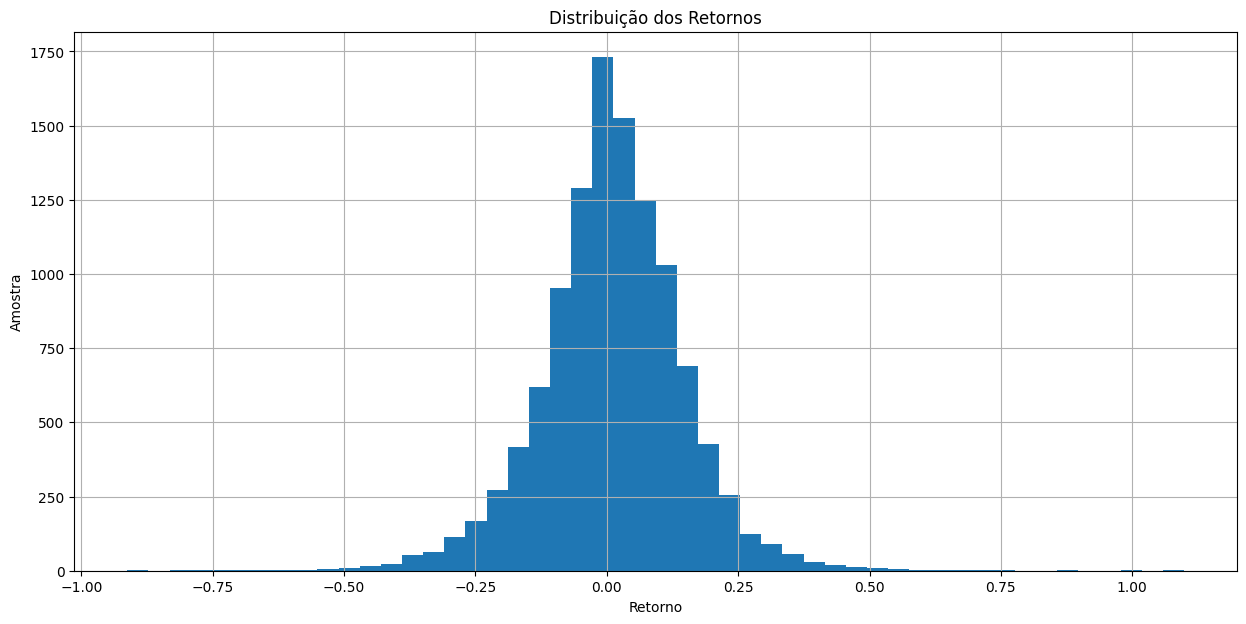


Operações com 20 pares:


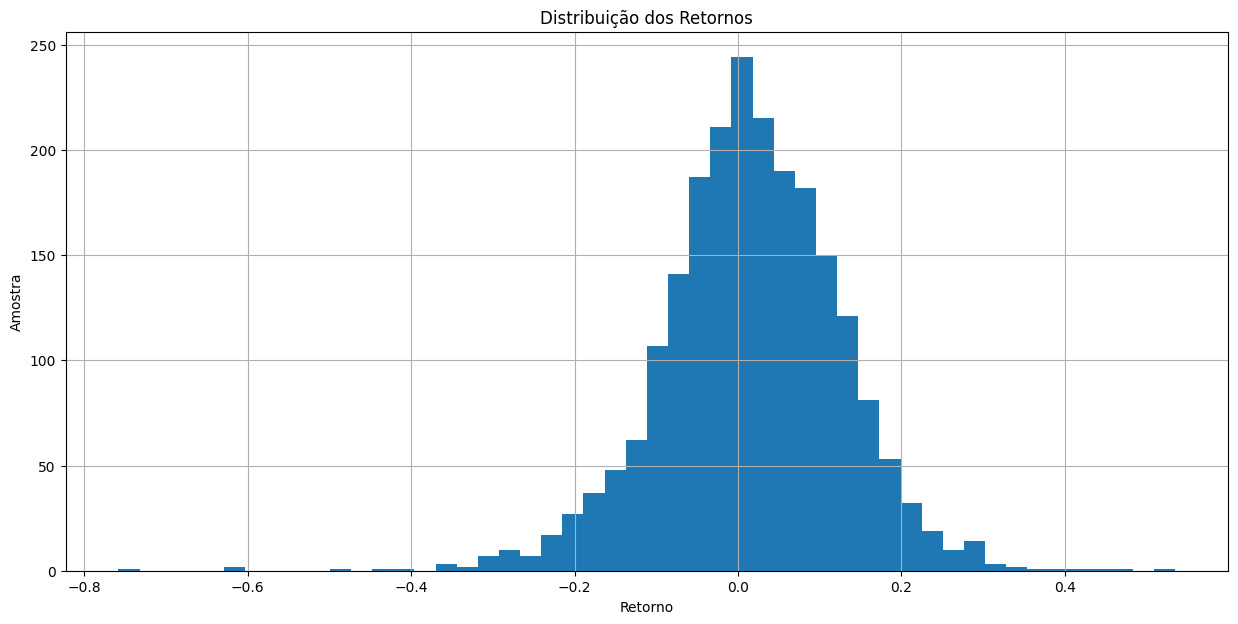


Operações com 10 pares:


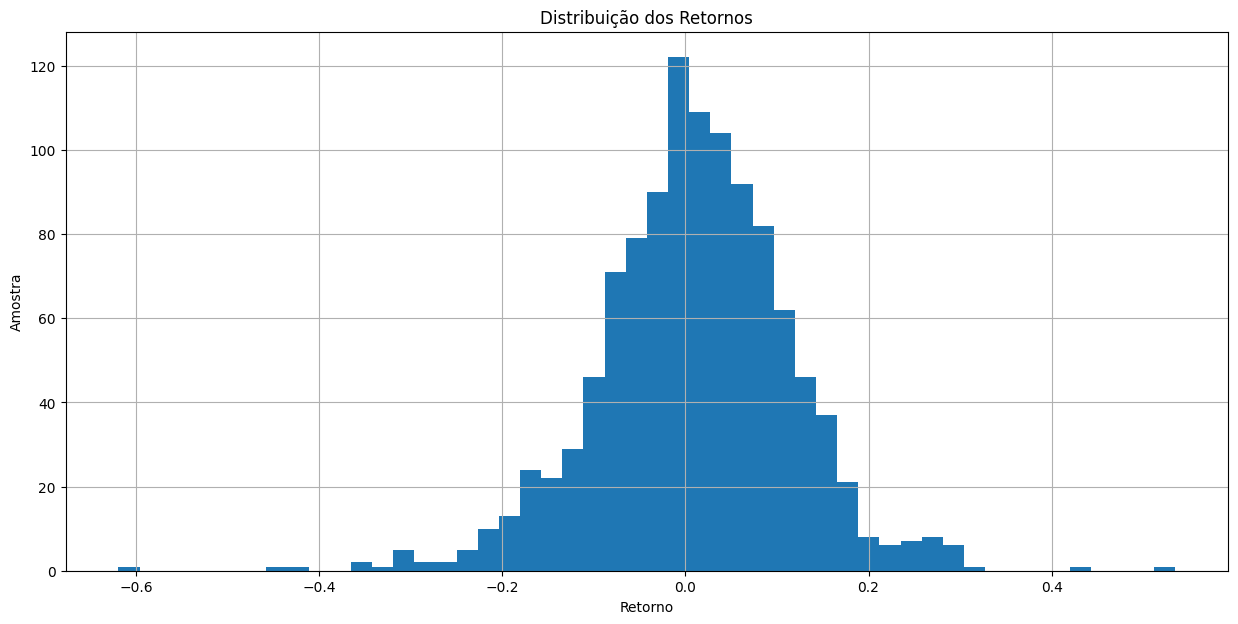


Operações com 5 pares:


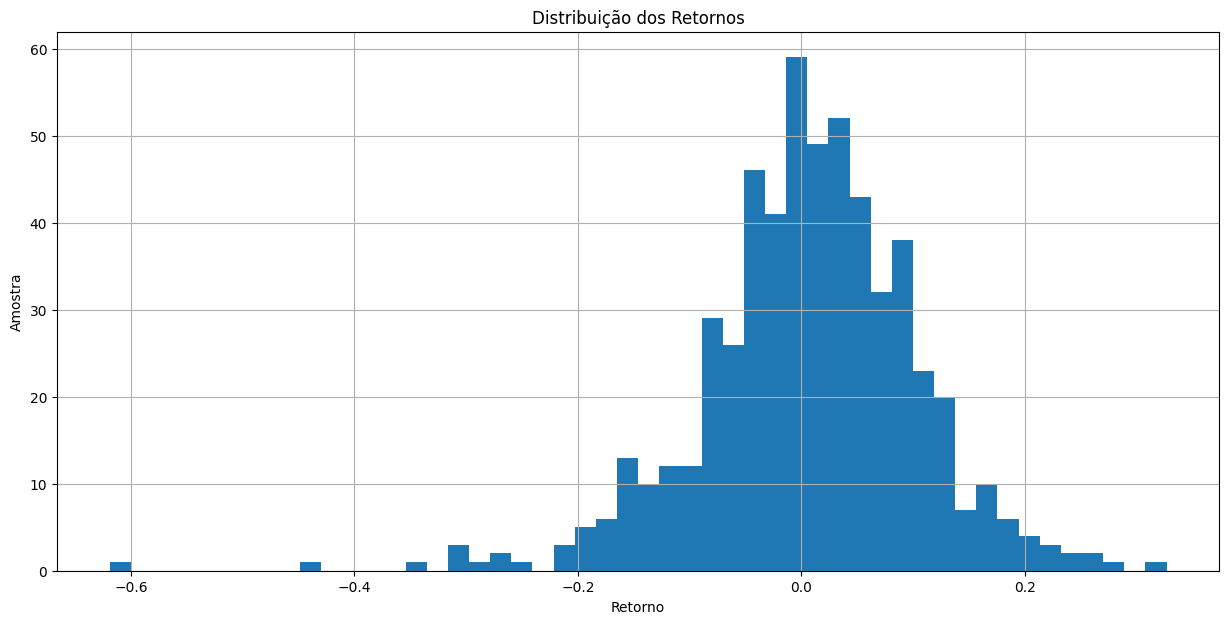

In [58]:
print("Operações com 100 pares:")
print_ret(operations100)
print("\nOperações com 20 pares:")
print_ret(operations20)
print("\nOperações com 10 pares:")
print_ret(operations10)
print("\nOperações com 5 pares:")
print_ret(operations5)

In [10]:
# Retorno por par
def print_rp(operations):
  operations_by_pair = operations.groupby("Pair").sum("Retorno total")
  print(f"Número de pares: {np.shape(operations_by_pair)[0]}")
  print(f"Retorno médio por par: {round(100*operations_by_pair['Retorno total'].mean(),4)}%")
  print(f"Retorno médio por par por semestre: {round(np.divide(100*operations_by_pair['Retorno total'].mean(),max(operations['Semestre'])+1),4)}%")

In [11]:
print("Operações com 100 pares:")
print_rp(operations100)
print("\nOperações com 20 pares:")
print_rp(operations20)
print("\nOperações com 10 pares:")
print_rp(operations10)
print("\nOperações com 5 pares:")
print_rp(operations5)

Operações com 100 pares:
Número de pares: 2192
Retorno médio por par: 5.4166%
Retorno médio por par por semestre: 0.0985%

Operações com 20 pares:
Número de pares: 627
Retorno médio por par: 5.5766%
Retorno médio por par por semestre: 0.1014%

Operações com 10 pares:
Número de pares: 345
Retorno médio por par: 3.1205%
Retorno médio por par por semestre: 0.0567%

Operações com 5 pares:
Número de pares: 179
Retorno médio por par: 1.8715%
Retorno médio por par por semestre: 0.034%


In [31]:
# Ações com maior participação
def participacoes(operations):
  stock_count = {}
  operations_by_pair = operations.groupby("Pair").sum("Retorno total")
  for pair in operations_by_pair.index:
      stocks = pair.split("-")
      for stock in stocks:
          if stock in stock_count:
              stock_count[stock] += 1
          else:
              stock_count[stock] = 1
  stock_count_df = pd.DataFrame(stock_count.items())
  stock_count_df = stock_count_df.sort_values(1)
  stock_count_df.to_csv(pasta + "stock_count_20_pairs.csv")
  print(stock_count_df)

In [57]:
print("Top pares com 5 pares:")
contagem_nomes = operations5['Pair'].value_counts()
print(contagem_nomes.head(5))
print("\nTop pares com 10 pares:")
contagem_nomes = operations10['Pair'].value_counts()
print(contagem_nomes.head(5))
print("\nTop pares com 20 pares:")
contagem_nomes = operations20['Pair'].value_counts()
print(contagem_nomes.head(5))
print("\nTop pares com 100 pares:")
contagem_nomes = operations100['Pair'].value_counts()
print(contagem_nomes.head(5))

Top pares com 5 pares:
Pair
BBDC4-BBDC3    35
ELET3-ELET6    26
CMIG4-CMIG3    22
USIM5-USIM3    16
VIVO3-VIVO4    14
Name: count, dtype: int64

Top pares com 10 pares:
Pair
BBDC4-BBDC3    41
ELET3-ELET6    28
CMIG4-CMIG3    28
USIM5-USIM3    17
EBTP3-EBTP4    16
Name: count, dtype: int64

Top pares com 20 pares:
Pair
BBDC4-BBDC3    50
ELET3-ELET6    31
CMIG4-CMIG3    29
USIM5-USIM3    21
EBTP3-EBTP4    20
Name: count, dtype: int64

Top pares com 100 pares:
Pair
BBDC4-BBDC3    94
GGBR4-GOAU4    64
CMIG4-CMIG3    58
EBTP3-EBTP4    55
OIBR3-OIBR4    43
Name: count, dtype: int64


In [32]:
print("Operações com 100 pares:")
participacoes(operations100)
print("\nOperações com 20 pares:")
participacoes(operations20)
print("\nOperações com 10 pares:")
participacoes(operations10)
print("\nOperações com 5 pares:")
participacoes(operations5)

Operações com 100 pares:
         0   1
195  PRIO3   1
147  SHAP4   1
176  EBEN4   1
177  EBTP3   1
151  BNCA3   1
..     ...  ..
0    ABEV3  58
75   CLSC4  60
2    BBAS3  61
3    BBDC3  63
187  ITUB4  70

[196 rows x 2 columns]

Operações com 20 pares:
         0   1
164  CTIP3   1
47   SOMA3   1
125  TNEP4   1
133  SLCE3   1
113  POSI3   1
..     ...  ..
128  VIVT3  24
49   BBAS3  26
145  ITUB4  28
75   BBDC4  30
1    BBDC3  30

[165 rows x 2 columns]

Operações com 10 pares:
         0   1
68   CSTB4   1
19   ARZZ3   1
92   TNEP4   1
119  LOGG3   1
117  JHSF3   1
..     ...  ..
24   BBAS3  15
18   CRUZ3  16
114  ITUB4  17
43   BBDC4  20
36   BBDC3  20

[143 rows x 2 columns]

Operações com 5 pares:
        0   1
58  TCSL4   1
86  POMO4   1
85  AEDU3   1
83  HGTX3   1
82  TAMM4   1
..    ...  ..
18  EGIE3   9
9   CRUZ3  11
22  BBDC3  11
87  ITUB4  12
26  BBDC4  14

[117 rows x 2 columns]


In [ ]:
'''
def rate_interest(principal, final_amount, time):
    rate = (100 * (final_amount/principal)**(1/time)) - 100
    print("Compound interest rate is", rate, "%")

daily_returns = pd.read_csv(pasta + "daily_returns.csv")
daily_returns = daily_returns.iloc[252:,:]
daily_returns = daily_returns / 35
cumulative = np.cumprod(1+daily_returns)
cumulative.plot()
rate_interest(1,cumulative.values[-1],25)
'''

In [ ]:
'''
# Cálculo do Sharpe para o período do estudo
mean_daily_return = daily_returns.values.mean()
print(f"Mean daily return: {mean_daily_return}")
returns_std_dev = daily_returns.values.std()

risk_free_mean = risk_free_rates['daily'].mean()
print(f"Mean risk free return: {risk_free_mean}")

print(f"Fully Invested Sharpe Ratio: {(mean_daily_return - risk_free_mean) / returns_std_dev}")
'''

Rascunho

In [ ]:
operations20['Retorno total'].sum()

In [ ]:
'''# prompt: Usando o DataFrame operations: plot operations['Retorno total'] as a time series

import pandas as pd

# convert 'Semestre' column to datetime
#operations['Semestre'] = pd.to_datetime(operations['Semestre'].astype(str) + '-01-01')

# create the plot
import altair as alt
alt.Chart(operations).mark_line().encode(
    x='Semestre',
    y='Retorno total'
)
'''